In [1]:
# Importing Dependencies
#%matplotlib notebook
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# _____________________________
import numpy as np
import pandas as pd
# _____________________________

import datetime as dt



In [2]:
#Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Getting Columns Name

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,prcp
count,345.000000
mean,0.432087
std,0.704363
min,0.000000
25%,0.010000
50%,0.140000
75%,0.580000
max,6.700000


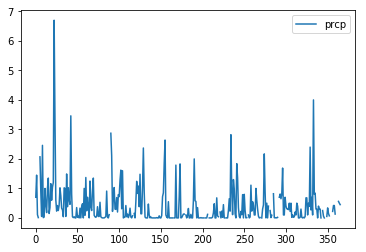

In [10]:
#1 Design a query to retrieve the last 12 months of precipitation data and plot the results jooop
engine.execute("select * from Measurement limit 10").fetchall()
session.query(func.count(Measurement.date)).all()



#2 Calculate the date 1 year ago from today.Design a query to retrieve the last 12 months of precipitation data.

current_year=session.query(func.max(Measurement.date)).all()
current_year


#3 Select only the `date` and `prcp` values. Load the query results into a Pandas DataFrame and set the index to the date column.

val_cal = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
        filter(Measurement.date <= "2017-08-23").\
        group_by(Measurement.date).all()
val_cal


 #4 Sort the DataFrame values by `date`
df = pd.DataFrame(val_cal, columns=['date','prcp'])

df.sort_values(by='date',ascending= True) 
df.rename(columns={0:"Date",1:"Precipitation"},inplace =True)
df.set_index('date')
df.head

# 5 Plot the Results in a Matplotlib bar chart
df.plot()
plt.figure(1)

#6 Use Pandas to print the summary statistics for the precipitation data.
df.describe()





In [11]:
#Station Analysis
# 1. Design a query to calculate the total number of stations.

total_stations = session.query(func.count(Station.station)).all()
total_stations


[(9)]

In [12]:
# 2. Design a query to find the most active stations. List the stations and observation counts in descending order.
# Which station has the highest number of observations? 
# Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

#Find the most active stations.
active_stations_val =active_stations[0] 
active_stations_val


('USC00519281', 2772)

In [13]:
#3 Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
# Plot the results as a histogram with `bins=12`.


temp_observation = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
temp_observation


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#4 Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
all_observations = session.query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == active_stations_val[0]).all()
all_observations

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [15]:
#5 Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_stations_val =active_stations[0] 
active_stations_val

active_stations_temps= session.query(Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").\
                       filter(Measurement.station == "USC00519281").all()
active_stations_temps
len(active_stations_temps)

all_temps= [z[0] for z in active_stations_temps]
all_temps



[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

<Figure size 432x288 with 0 Axes>

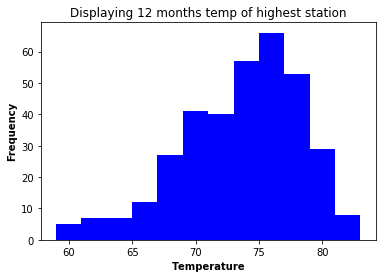

<Figure size 432x288 with 0 Axes>

In [16]:
#plt.hist(all_temps, bins= 12)
plt.hist(all_temps, bins=12, color="blue")
plt.title("Displaying 12 months temp of highest station")
labels = ['tobs']
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
plt.figure(2)


69.57142857142857
62.0
74.0
None


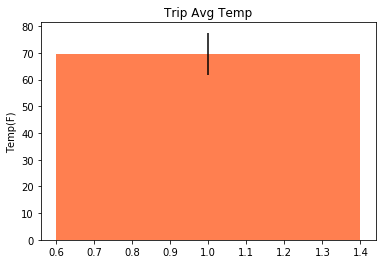

<Figure size 432x288 with 0 Axes>

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
start_date ="2017-01-01" 
end_date= "2018-01-01"
def calc_temps(start_date, end_date):
    cal_btwn_dates= session.query(Measurement.tobs).\
                     filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    values_dates= [k[0] for k in cal_btwn_dates]
    avg_temp=np.mean(values_dates)
    minimum_temp=min(values_dates)
    maximum_temp=max(values_dates)
    print(avg_temp)
    print(minimum_temp)
    print(maximum_temp)
print(calc_temps('2012-02-28', '2012-03-05'))

#plt.bar(1,avg_temp, yerr=(maximum_temp-minimum_temp), align='center', color="coral")
plt.bar(1,height = 69.57, yerr = 8, align='center', color="coral")


plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.figure(3)
plt.show()




In [18]:
active_stations_val =active_stations 
active_stations_val

station_list = []
for g in active_stations_val:
    station_list.append(g)

all_stations = session.query(Measurement.station, func.sum(Measurement.prcp), func.sum(Measurement.tobs), Station.name, Station.latitude, Station.longitude, Station.elevation).\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()
all_stations


[('USC00516128',
  9612.810000000345,
  1667070.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  5297.7600000003895,
  1787868.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00513117',
  3443.5800000001063,
  1772235.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519523',
  2661.120000000018,
  1790613.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00514830',
  2110.40999999993,
  1483839.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519397',
  1184.5799999999226,
  1827747.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00511918',
  834.119999999968,
  1275552.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00518838',
  637.8299999999936,
  334458.0,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00517948',
  390.95999999999873,
  922203.

In [19]:
# Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

date="01-01"
def daily_normals(date):
    daily_normals("01-01")
    
sell = [func.min(Measurement.tobs), 
           func.avg(Measurement.tobs), 
           func.max(Measurement.tobs)]

daily_nor = session.query(* sell).\
            filter(func.strftime("%m-%d", Measurement.date) == date).all()
daily_nor

   


[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


start = "2017-01-01"
end = "2017-01-07"

def daily_normals(start,end):
    daily_normals_date = session.query(Measurement.tobs).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    daily_dates = [l[0] for l in daily_normals_date]
    avgg_temps = np.mean(daily_dates)
    min_temps = min(daily_dates)
    max_temps = max(daily_dates)   
    print(avgg_temps)
    print(min_temps)
    print(max_temps)
print(daily_normals("2017-01-01","2017-01-07"))

aaa= pd.DataFrame(daily_normals_date)
aaa.head()


# (62.0, 69.15384615384616, 77.0),
#  (60.0, 69.39622641509433, 77.0),
#  (62.0, 68.9090909090909, 77.0),
#  (58.0, 70.0, 76.0),
#  (56.0, 67.96428571428571, 76.0),
#  (61.0, 68.96491228070175, 76.0),
#  (57.0, 68.54385964912281, 76.0)]

68.36585365853658
62.0
74.0
None


NameError: name 'daily_normals_date' is not defined

In [ ]:

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`